# Math 151B Homework No. 4 

### Brandon Loptman
### UID: 604105043
### February 25, 2020

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [26]:
def f1(t,x1,x2):
    return x2

def f2(p, q, r):
    def innerFunc(t,x1,x2):
        return p(t)*x2 + q(t)*x1 + r(t)
    return innerFunc

In [27]:
def RK4_2D_System(f1,f2,t0,y0,h,N):
    """
    """
    
    T = np.array([t0 + n * h for n in range(N+1)])
    Y = np.zeros([N+1,2])
    
    Y[0,0] = y0[0]
    Y[0,1] = y0[1]
    
    for n in range(N):
        #print("n = ", n)
        #print("\n")
        
        k1  = h*f1(T[n],Y[n,0],Y[n,1])
        k1_ = h*f2(T[n],Y[n,0],Y[n,1])
        
        #print("k1: ", k1)
        #print("k1_: ", k1_)
        #print("\n")
        
        k2  = h*f1(T[n]+0.5*h,Y[n,0]+0.5*k1,Y[n,1]+0.5*k1_)
        k2_ = h*f2(T[n]+0.5*h,Y[n,0]+0.5*k1,Y[n,1]+0.5*k1_)
        
        #print("k2: ", k2)
        #print("k2_: ", k2_)
        #print("\n")

        
        k3  = h*f1(T[n]+0.5*h,Y[n,0]+0.5*k2,Y[n,1]+0.5*k2_)
        k3_ = h*f2(T[n]+0.5*h,Y[n,0]+0.5*k2,Y[n,1]+0.5*k2_)
        
        #print("k3: ", k3)
        #print("k3_: ", k3_)
        #print("\n")


        k4  = h*f1(T[n+1],Y[n,0]+k3,Y[n,1]+k3_)
        k4_ = h*f2(T[n+1],Y[n,0]+k3,Y[n,1]+k3_)
        
        #print("k4: ", k4)
        #print("k4_: ", k4_)
        #print("\n")

        Y[n+1,0] = Y[n,0] + (1/6)*(k1+ 2*k2 + 2*k3 + k4)
        Y[n+1,1] = Y[n,1] + (1/6)*(k1_+ 2*k2_ + 2*k3_ + k4_)
        
    return T,Y

In [28]:
def Linear_Shooting_Method(p,q,r,a,b,alpha,beta,N):
    """
    """
    
    h = (b-a)/N
    
    u0 = np.array([alpha,0])
    v0 = np.array([0,1])
    
    T = np.zeros(N+1)
    U = np.zeros([N+1,2])
    V = np.zeros([N+1,2])
    W = np.zeros([N+1,2])

    T,U = RK4_2D_System(f1,f2(p,q,r),a,u0,h,N)
    print("U = ", U)
    
    T,V = RK4_2D_System(f1,f2(p,q,r),a,v0,h,N)
    print("V = ", V)
    
    W[0,0] = alpha
    W[0,1] = (beta - U[N,0])/V[N,0]
    
    for n in range(1,N+1):
        W[n,0] = U[n,0] + W[0,1]*V[n,0]
        W[n,1] = U[n,1] + W[0,1]*V[n,1]
        
    print("W = ", W)
    
    return T,W

In [29]:
def p(t):
    return -2/t

def q(t):
    return 2/(t**2)

def r(t):
    return np.sin(np.log(t))/(t**2)

a = 1.0
b = 2.0

alpha = 1.0
beta = 2.0

N = 10

T,W = Linear_Shooting_Method(p,q,r,a,b,alpha,beta,N)

print("T values: ", T)
print("Approximate Y values: ", W[:,0])

U =  [[1.         0.        ]
 [1.00896058 0.16978958]
 [1.03245472 0.29393896]
 [1.06674375 0.38765183]
 [1.10928795 0.46027852]
 [1.1583     0.51781759]
 [1.21248371 0.56425894]
 [1.27087454 0.6023407 ]
 [1.33273851 0.63399389]
 [1.39750618 0.66061333]
 [1.46472815 0.68322815]]
V =  [[0.         1.        ]
 [0.09132029 0.83821903]
 [0.16947822 0.73222213]
 [0.23891782 0.66121737]
 [0.30246929 0.61286282]
 [0.36198758 0.57955315]
 [0.41871761 0.55645192]
 [0.47351134 0.54040021]
 [0.52696125 0.529287  ]
 [0.57948473 0.52167349]
 [0.63137891 0.51656229]]
W =  [[1.         0.84778228]
 [1.0863803  0.88041682]
 [1.17613535 0.91470391]
 [1.26929405 0.94822019]
 [1.36571605 0.97985275]
 [1.46518665 1.00915247]
 [1.56746508 1.03600902]
 [1.67230907 1.06048243]
 [1.77948692 1.08271402]
 [1.88878306 1.10287887]
 [2.         1.12116051]]
T values:  [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
Approximate Y values:  [1.         1.0863803  1.17613535 1.26929405 1.36571605 1.46518665
 1.5674650

## 11.1
### 1.)

In [30]:
def p(t):
    return 0.0

def q(t):
    return 4.0

def r(t):
    return -4.0*t

def exact_y(t):
    return np.exp(2)*((np.exp(4)-1)**-1)*(np.exp(2*t)-np.exp(-2*t)) + t  

a = 0.0
b = 1.0

alpha = 0.0
beta = 2.0

### (a.)

U =  [[ 0.00000000e+00  0.00000000e+00]
 [-6.66666667e-04 -2.00666667e-02]
 [-5.37342222e-03 -8.10711156e-02]
 [-1.83224079e-02 -1.85461641e-01]
 [-4.40465493e-02 -3.37427727e-01]
 [-8.75914746e-02 -5.43068187e-01]
 [-1.54718008e-01 -8.10635923e-01]
 [-2.52133365e-01 -1.15086913e+00]
 [-3.87760334e-01 -1.57742228e+00]
 [-5.71055234e-01 -2.10741405e+00]
 [-8.13387423e-01 -2.76211440e+00]]
V =  [[0.  1. ]
 [0.1 1. ]
 [0.2 1. ]
 [0.3 1. ]
 [0.4 1. ]
 [0.5 1. ]
 [0.6 1. ]
 [0.7 1. ]
 [0.8 1. ]
 [0.9 1. ]
 [1.  1. ]]
W =  [[0.         2.81338742]
 [0.28067208 2.79332076]
 [0.55730406 2.73231631]
 [0.82569382 2.62792578]
 [1.08130842 2.4759597 ]
 [1.31910224 2.27031924]
 [1.53331445 2.0027515 ]
 [1.71723783 1.66251829]
 [1.8629496  1.23596515]
 [1.96099345 0.70597338]
 [2.         0.05127303]]
T values:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Exact Y values:  [0.         0.15551248 0.31325286 0.47553849 0.64486908 0.82402714
 1.01618954 1.22505509 1.45499294 1.71121796 2.        ]
App

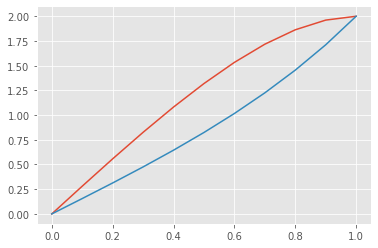

In [31]:
N = 10

T,W = Linear_Shooting_Method(p,q,r,a,b,alpha,beta,N)
Y = exact_y(T)

print("T values: ", T)
print("Exact Y values: ",Y)
print("Approximate Y values: ", W[:,0])

plt.plot(T,W[:,0])
plt.plot(T,Y)
plt.show()

### (b.)

U =  [[ 0.          0.        ]
 [-0.01041667 -0.12760417]
 [-0.08729384 -0.54275852]
 [-0.31399501 -1.35138535]
 [-0.81210514 -2.75976005]]
V =  [[0.   1.  ]
 [0.25 1.  ]
 [0.5  1.  ]
 [0.75 1.  ]
 [1.   1.  ]]
W =  [[0.         2.81210514]
 [0.69260962 2.68450097]
 [1.31875873 2.26934662]
 [1.79508385 1.46071979]
 [2.         0.05234509]]
T values:  [0.   0.25 0.5  0.75 1.  ]
Exact Y values:  [0.         0.39367669 0.82402714 1.33708613 2.        ]
Approximate Y values:  [0.         0.69260962 1.31875873 1.79508385 2.        ]


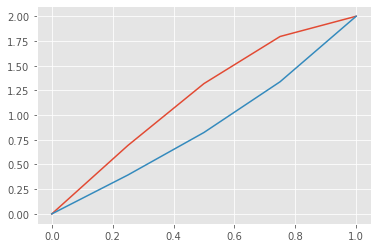

In [32]:
N = 4

T,W = Linear_Shooting_Method(p,q,r,a,b,alpha,beta,N)
Y = exact_y(T)

print("T values: ", T)
print("Exact Y values: ",Y)
print("Approximate Y values: ", W[:,0])

plt.plot(T,W[:,0])
plt.plot(T,Y)
plt.show()

In [33]:
def Nonlinear_Shooting_Method(a,b,alpha, beta, n, tol, M):
    """
    """

    w1 = np.zeros(n+1)  
    w2 = np.zeros(n+1)
    X = np.zeros(n+1)
    h = (b-a)/n
    k = 1
    TK = (beta - alpha)/(b - a)

    while k <= M:

        w1[0] = alpha
        w2[0] = TK
        u1    = 0
        u2    = 1

        for i in range(1,n+1):
            x = a + (i-1)*h    #step 5
            
            t = x + 0.5*(h)

            k11 = h*w2[i-1]     #step 6

            k12 = h*f(x,w1[i-1],w2[i-1])
            k21 = h*(w2[i-1] + (1/2)*k12)
            k22 = h*f(t, w1[i-1] + (1/2)*k11, w2[i-1] + (1/2)*k12)
            k31 = h*(w2[i-1] + (1/2)*k22)
            k32 = h*f(t, w1[i-1] + (1/2)*k21, w2[i-1] + (1/2)*k22)
            t   = x + h
            k41 = h*(w2[i-1]+k32)
            k42 = h*f(t, w1[i-1] + k31, w2[i-1] + k32)
            w1[i] = w1[i-1] + (k11 + 2*k21 + 2*k31 + k41)/6
            w2[i] = w2[i-1] + (k12 + 2*k22 + 2*k32 + k42)/6   
            kp11 = h*u2
            kp12 = h*(fy(x,w1[i-1],w2[i-1])*u1 + fyp(x,w1[i-1], w2[i-1])*u2)
            t    = x + 0.5*(h)
            kp21 = h*(u2 + (1/2)*kp12)
            kp22 = h*((fy(t, w1[i-1],w2[i-1])*(u1 + (1/2)*kp11)) + fyp(x+h/2, w1[i-1],w2[i-1])*(u2 +(1/2)*kp12))
            kp31 = h*(u2 + (1/2)*kp22)
            kp32 = h*((fy(t, w1[i-1],w2[i-1])*(u1 + (1/2)*kp21)) + fyp(x+h/2, w1[i-1],w2[i-1])*(u2 +(1/2)*kp22))
            t    = x + h
            kp41 = h*(u2 + kp32)
            kp42 = h*(fy(t, w1[i-1], w2[i-1])*(u1+kp31) + fyp(x + h, w1[i-1], w2[i-1])*(u2 + kp32))
            u1 = u1 + (1/6)*(kp11 + 2*kp21 + 2*kp31 + kp41)
            u2 = u2 + (1/6)*(kp12 + 2*kp22 + 2*kp32 + kp42)

        r = np.abs(w1[n] - beta)
        
        if r < tol:
            for i in range(0,n+1):
                X[i] = a + i*h
                
            return X, w1

        TK = TK -(w1[n]-beta)/u1

        k = k+1

    print("Maximum number of iterations exceeded")   
    return X, w1

## 11.2
### 1.)

X values:  [1.  1.5 2. ]
Exact Y values:  [0.         0.40546511 0.69314718]
Approximate Y values:  [0.         0.40549954 0.69314718]


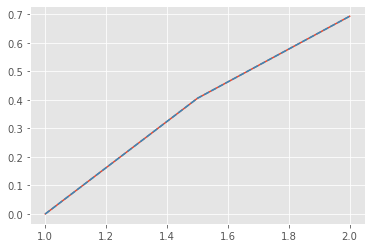

In [34]:
def f(x,y,yp):
    fx = -(yp**2)-y+np.log(x)
    return fx

def fy(xp,z,zp):
    fyy = -1
    return fyy

def fyp(xpp,zpp,zppp):
    fypp = -2*zppp
    return fypp

def y_exact(x):
    return np.log(x)

a = 1          
b = 2         
alpha = 0
beta = np.log(2) 
N = 2     
M = 100        
tol = 1e-12


X,W = Nonlinear_Shooting_Method(a,b,alpha,beta,N,tol,M)
Y_exact = y_exact(X)

print("X values: ", X)
print("Exact Y values: " , Y_exact)
print("Approximate Y values: ", W)

plt.plot(X,W)
plt.plot(X,Y_exact,linestyle="--")
plt.show()

In [35]:
def F(f,x,n):
    fx = np.zeros([n,1])
    
    for i in range(n):
        fx[i] = f[i](x)
    
    return fx

def J(j,x,n):
    jx = np.zeros([n,n])
    
    for i in range(n):
        for k in range(n):
            jx[i,k] = j[i,k](x)
            
    return jx

In [36]:
def Newton_Method_Systems(n,x0,tol,N):
    k = 1
    x = x0
    while(k <= N):
        #print("iteration ", k)
        
        fx = F(f,x,n)
        jx = J(j,x,n)
        
        #print("J(x) = \n", jx)
        #print("F(x) = \n", fx)
        
        #jx_inv = np.linalg.inv(jx)
        
        #print("F(x) = \n", fx)
        #print("J(x) = \n", jx)
        #print("J(x) Inverse = \n", jx_inv)

        
        y = -1*np.linalg.solve(jx,fx)
        y = y.reshape(n)
        
        x = x + y 
        
        #print("y = ", y)
        #print("x = ", x)
        
        if(np.linalg.norm(y) < tol):
            print("The procedure was successful!")
            return x
        
        k = k + 1
        
    print("Max number of iterations surpassed. The procedure was unsuccessful!")
    return x

## 10.2
### 1.)

### (a.)

In [37]:
def f1(x):
    return 4*(x[0]**2) - 20*x[0] + .25*(x[1]**2) + 8
def f2(x):
    return 0.5*x[0]*(x[1]**2) + 2*x[0] - 5*x[1] + 8
def j11(x):
    return 8*x[0] - 20
def j12(x):
    return 0.5*x[1]
def j21(x): 
    return 0.5*x[1]**2 + 2
def j22(x):
    return x[0]*x[1] - 5

n = 2
tol = 10e-12
N = 2

f = np.array([f1,f2])
j = np.array([[j11,j12],[j21,j22]])
x0 = np.array([0,0])

x = Newton_Method_Systems(n,x0,tol,N)

print(x)

Max number of iterations surpassed. The procedure was unsuccessful!
[0.49589361 1.98342347]


### (b.)

In [38]:
def f1(x):
    return np.sin(4*np.pi*x[0]*x[1]) - 2*x[1] - x[0]
def f2(x):
    return ((4*np.pi-1)/(4*np.pi))*(np.exp(2*x[0])-np.exp(1)) + 4*np.exp(1)*(x[1]**2) - 2*np.exp(1)*x[0]
def j11(x):
    return 4*np.pi*x[1]*np.cos(4*np.pi*x[0]*x[1]) - 1
def j12(x):
    return 4*np.pi*x[0]*np.cos(4*np.pi*x[0]*x[1]) - 2
def j21(x): 
    return ((4*np.pi-1)/(4*np.pi))*2*np.exp(2*x[0]) - 2*np.exp(1)
def j22(x):
    return 8*np.exp(1)*x[1]

n = 2
tol = 10e-12
N = 2

f = np.array([f1,f2])
j = np.array([[j11,j12],[j21,j22]])
x0 = np.array([0,0])

x = Newton_Method_Systems(n,x0,tol,N)

print(x)

Max number of iterations surpassed. The procedure was unsuccessful!
[-0.51316159 -0.01837622]


### (c.)

In [39]:
def f1(x):
    return x[0]*(1-x[0]) + 4*x[1] - 12
def f2(x):
    return (x[0]-2)**2 + (2*x[1]-3)**2 - 25
def j11(x):
    return 1 - 2*x[0]
def j12(x):
    return 4
def j21(x): 
    return 2*(x[0]-2)
def j22(x):
    return 4*(2*x[1]-3)

n = 2
tol = 10e-12
N = 2

f = np.array([f1,f2])
j = np.array([[j11,j12],[j21,j22]])
x0 = np.array([0,0])

x = Newton_Method_Systems(n,x0,tol,N)

print(x)

Max number of iterations surpassed. The procedure was unsuccessful!
[-23.94262597   7.60867966]


### (d.)
The matrix $J(x^{(0)})$ is singular so Newton's method cannot be applied.

### 2.)

### (a.)

In [40]:
def f1(x):
    return 3*x[0]-np.cos(x[2]*x[1])-0.5
def f2(x):
    return 4*(x[0]**2)-625*(x[1]**2)+2*x[1]-1
def f3(x):
    return np.exp(-x[0]*x[1])+20*x[2]+((10*np.pi-3)/3)
def j11(x):
    return 3
def j12(x):
    return x[2]*np.sin(x[1]*x[2])
def j13(x): 
    return x[1]*np.sin(x[1]*x[2])
def j21(x):
    return 8*x[0]
def j22(x):
    return 1250*x[1] + 2
def j23(x):
    return 0
def j31(x):
    return -x[2]*np.exp(-x[1]*x[0])
def j32(x):
    return 0
def j33(x):
    return 20

n = 3
tol = 10e-6
N = 2

f = np.array([f1,f2,f3])
j = np.array([[j11,j12,j13],[j21,j22,j23],[j31,j32,j33]])
x0 = np.array([0,0,0])

x = Newton_Method_Systems(n,x0,tol,N)

print(x)

Max number of iterations surpassed. The procedure was unsuccessful!
[ 0.47794703  0.74774834 -0.51208918]


### (b.)

In [41]:
def f1(x):
    return (x[0]**2)+x[1]-37
def f2(x):
    return x[0]-(x[1]**2)-5
def f3(x):
    return x[0]+x[1]+x[2]-3
def j11(x):
    return 2*x[0]
def j12(x):
    return 1
def j13(x): 
    return 0
def j21(x):
    return 1
def j22(x):
    return -4*x[1]
def j23(x):
    return 0
def j31(x):
    return 1
def j32(x):
    return 1
def j33(x):
    return 1

n = 3
tol = 10e-12
N = 2

f = np.array([f1,f2,f3])
j = np.array([[j11,j12,j13],[j21,j22,j23],[j31,j32,j33]])
x0 = np.array([0,0,0])

x = Newton_Method_Systems(n,x0,tol,N)

print(x)

Max number of iterations surpassed. The procedure was unsuccessful!
[  3.42606347  27.73936529 -28.16542876]


### (c.)

In [42]:
def f1(x):
    return 15*x[0]+(x[1]**2)-4*x[2]-13
def f2(x):
    return (x[0]**2)+10*x[1]-x[2]-11
def f3(x):
    return (x[1]**3)-25*x[2]+22
def j11(x):
    return 15
def j12(x):
    return 2*x[1]
def j13(x): 
    return -2
def j21(x):
    return 2*x[0]
def j22(x):
    return 10
def j23(x):
    return -1
def j31(x):
    return 0
def j32(x):
    return 3*(x[1]**2)
def j33(x):
    return -25

n = 3
tol = 10e-12
N = 2

f = np.array([f1,f2,f3])
j = np.array([[j11,j12,j13],[j21,j22,j23],[j31,j32,j33]])
x0 = np.array([0,0,0])

x = Newton_Method_Systems(n,x0,tol,N)

print(x)

Max number of iterations surpassed. The procedure was unsuccessful!
[1.02988426 1.08714296 0.92998579]


### (d.)
The matrix $J(x^{(0)})$ is singular so Newton's method cannot be applied.

In [43]:
def f1(x):
    return 10*x[0]-2*(x[1]**2)+x[1]-2*x[2]-5
def f2(x):
    return 8*(x[1]**2)+4*(x[2]**3)-9
def f3(x):
    return 8*x[1]*x[2]+4
def j11(x):
    return 10
def j12(x):
    return -4*x[1]+1
def j13(x): 
    return -2
def j21(x):
    return 0
def j22(x):
    return 16*x[1]
def j23(x):
    return 8*x[2]
def j31(x):
    return 0
def j32(x):
    return 8*x[2]
def j33(x):
    return 8*x[1]

n = 3
tol = 10e-12
N = 2

f = np.array([f1,f2,f3])
j = np.array([[j11,j12,j13],[j21,j22,j23],[j31,j32,j33]])
x0 = np.array([0,0,0])

x = Newton_Method_Systems(n,x0,tol,N)

print(x)

LinAlgError: Singular matrix